In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pl.read_excel('data/in/The Internet Movie Script Dataset .xlsx')
df.head()

Sr.No,Movie,Writers,Genre,Date,Sript
i64,str,str,str,str,str
1,"""9""","""Pamela Pettler,Shane Acker""","""Animation,Adventure,Drama,Fant…","""September_2009""",""",SEQ.,05,-,PROLOGUE ,,,,, ,,…"
2,"""A Scanner Darkly""","""Charlie Kaufman""","""Animation,Crime,Drama""","""July_2006""","""SHOT,OF,NOTEBOOK,PAGE,DAPPLED,…"
3,"""Aladdin""","""Roger Allers,Ron Clements""","""Animation,Family,Musical,Fanta…","""December_1992""","""PEDDLER:,,Oh,I,come,from,a,lan…"
4,"""Anastasia ""","""Susan Gauthier,Bruce Graham""","""Family,Animation,Musical""","""December_1997""","""FADE,IN: on,a,well-worn,PHO…"
5,"""Antz ""","""Todd Alcott,Chris Weitz,Paul W…","""Adventure,Animation,Comedy,Fan…",null,"""Z,(O.S.) ,,,,,,,,,,,(over,a,d…"


In [28]:
df = df.rename({"Sript": "script"})
print(df.shape)
print(df["Movie"].n_unique())

(60, 6)
59


In [29]:
dupd = df.filter(df["Movie"].is_duplicated())
dupd

Sr.No,Movie,Writers,Genre,Date,script
i64,str,str,str,str,str
28,"""Nightmare Before Christmas The""","""Tim Burton,Michael McDowell""","""Animation,Comedy,Fantasy,Horro…","""August_1991""","""NARRATOR 'Twas a long time ag…"
29,"""Nightmare Before Christmas The""","""Caroline Thompson""","""Animation,Comedy,Fantasy,Horro…","""August_1991""","""NARRATOR 'Twas a long time ag…"


In [30]:
dupd["script"][0] == dupd["script"][1]

True

In [32]:
dupd["Genre"][0] == dupd["Genre"][1]

True

In [ ]:
df[27, "Writers"] = df[27, "Writers"] + ',' + df[28, "Writers"]

df = df.filter(
    pl.col("Sr.No")!=29
)

print(df.shape)
print(df["Movie"].n_unique())

Sr.No,Movie,Writers,Genre,Date,script
i64,str,str,str,str,str
28,"""Nightmare Before Christmas The""","""Tim Burton,Michael McDowell,Ca…","""Animation,Comedy,Fantasy,Horro…","""August_1991""","""NARRATOR 'Twas a long time ag…"
29,"""Nightmare Before Christmas The""","""Caroline Thompson""","""Animation,Comedy,Fantasy,Horro…","""August_1991""","""NARRATOR 'Twas a long time ag…"


In [64]:
print(df[0, "script"][:350])

,SEQ.,05,-,PROLOGUE
,,,,,
,,,,,,The,Focus,Features,logo,appears,on,screen,and,we,slide,INTO
,,,,,the,"O",in,Focus.
,,,,,
,,,,,Stock,dissolves,from,35mm,to,16mm.,,,,BLACK,&,WHITE.,,GRAINY,
,,,,,like,OLD,DOCUMENTARY,FOOTAGE.
,,,,,
,,,,,,,,,,,,,,,,,SCIENTIST'S,VOICE
,,,,,,,,,,,,Experiment,208,day,20...
,,,,,
,,,,,
,,,,,INT.,SCIENTIST'S,LAB


<Axes: xlabel='fraction_commas', ylabel='Count'>

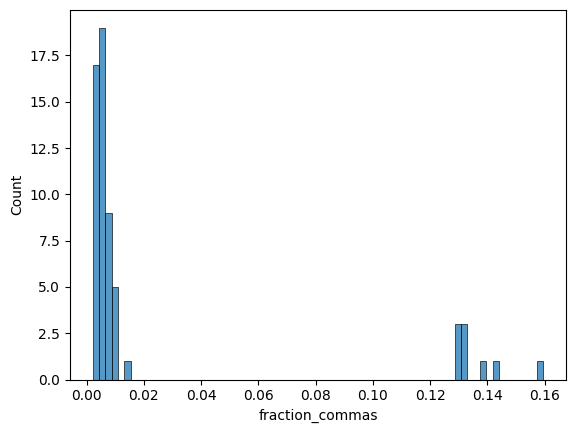

In [69]:
df = df.with_columns(
    comma_count = pl.col("script").str.count_matches(r'[,]+'),
    script_length = pl.col("script").str.len_chars()
).with_columns(
    fraction_commas = pl.col("comma_count")/pl.col("script_length")
)

sns.histplot(
    df,
    x="fraction_commas"
)

In [71]:

df = df.with_columns(
    script_clean = pl.when(
        pl.col("fraction_commas") > 0.1
    ).then(
        pl.col("script").str.replace_all(r'[,]+', " ")
    ).otherwise(pl.col("script"))
)

In [73]:
print(df[0, "script_clean"][:350])

 SEQ. 05 - PROLOGUE
 
 The Focus Features logo appears on screen and we slide INTO
 the "O" in Focus.
 
 Stock dissolves from 35mm to 16mm. BLACK & WHITE. GRAINY 
 like OLD DOCUMENTARY FOOTAGE.
 
 SCIENTIST'S VOICE
 Experiment 208 day 20...
 
 
 INT. SCIENTIST'S LAB - DAY

 We see an early incarnation of a MACHINE (this will be the
 
